In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from Bio import AlignIO
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import pickle
from scipy.stats import fisher_exact

In [3]:
#homoplasy_info=pickle.load(open( "/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/010_homoplasy/vars/recombinationFree_homoplasies", "rb" ) )
homoplasy_info_annotated=pickle.load(open( "/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/010_homoplasy/vars/20210722_MAS_recombinationFree_homoplasies", "rb" ) )

In [4]:
recombFree_mutation_events=pd.read_csv('/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/010_homoplasy/snppar_output/mas_recombinationFree/mas_recombFree_snppar_all_mutation_events.tsv', sep='\t')

/home/nac18/anaconda3/envs/homoplasy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7,8,9,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Take all SNPs where homoplasy count is at least 2:

In [5]:
homoplasies=homoplasy_info_annotated[homoplasy_info_annotated.homoplasy_count>1]
np.shape(homoplasies)

(14611, 9)

Get a dictionary mapping the snp position to the flush-alignment position (full, flush-alignment position is indexed from 0:

In [6]:
snp_pos=[line.rstrip('\n') for line in open('/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/010_homoplasy/vars/mas_masked_snp_positions.txt')]
snp_pos_series=pd.Series(snp_pos)
snp_pos_dict=dict(zip(snp_pos_series, snp_pos_series.index))

Load in the full alignment:

In [7]:
masked_snpAln_unwrapped="/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/010_homoplasy/vars/mas_masked_snpAln_unwrapped.fasta"
aln_masked=AlignIO.read(masked_snpAln_unwrapped, "fasta")

Load MAS cluster data:

In [8]:
# All MAS clusters
# NOTE: this doesn't look like it will be a really useful analysis because there aren't very many examples of long branching in the MAS tree (see below)
cluster_info=pd.read_csv('/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/working_trees/mas/mas_iqtree_noOutgroup_ROOTED_treeGubbins_filtered.csv')

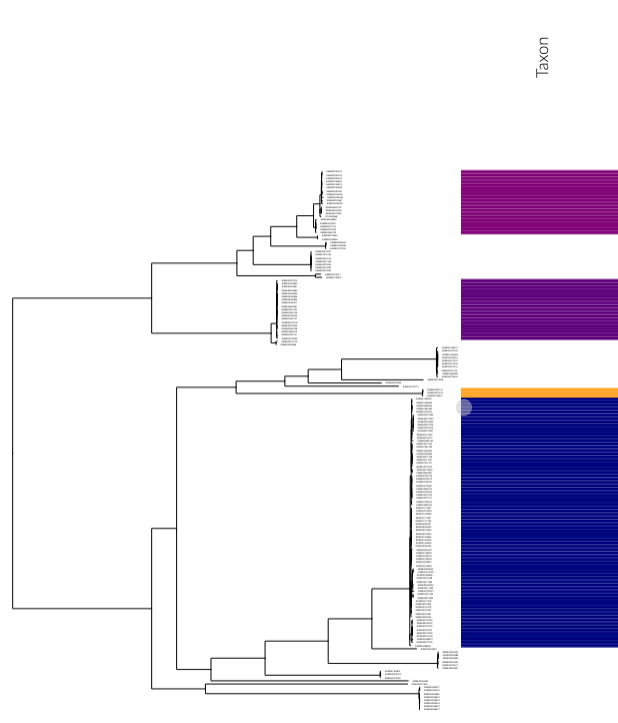

In [9]:
# Load isolates in large MAS cluster:
#! touch /n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/metadata/clusters/mas_cluster.txt
mas_cluster_isolates=[line.rstrip('\n') for line in open('/n/data1/hms/dbmi/farhat/nikki/abscessus/0_NOTEBOOKS/metadata/clusters/mas_cluster.txt')]

## Look for mutations in branches defining MAS cluster:

In [10]:
n91_muts=recombFree_mutation_events[recombFree_mutation_events.Derived_Node=='NODE_0000091']
n91_muts

,Position,Type,Ancestor_Node,Derived_Node,Ancestor_Call,Derived_Call,Gene,Strand,Codon,Codon_Position,...,Derived_Codon,Ancestor_A.A.,Derived_A.A.,Change,Up_Gene,Up_Gene_Strand,Up_Gene_Distance,Down_Gene,Down_Gene_Strand,Down_Gene_Distance
861,58807,intragenic,NODE_0000090,NODE_0000091,C,T,MMASJCM_RS00305,-1,263,1,...,AGG,G,R,NS,-,-,-,-,-,-
867,58889,intragenic,NODE_0000090,NODE_0000091,T,C,MMASJCM_RS00305,-1,235,3,...,GCG,A,A,S,-,-,-,-,-,-
869,58958,intragenic,NODE_0000090,NODE_0000091,G,A,MMASJCM_RS00305,-1,212,3,...,CCT,P,P,S,-,-,-,-,-,-
890,59743,intragenic,NODE_0000090,NODE_0000091,G,C,MMASJCM_RS00310,1,38,3,...,GAC,E,D,NS,-,-,-,-,-,-
2229,154932,intragenic,NODE_0000090,NODE_0000091,T,C,MMASJCM_RS00795,1,68,3,...,TTC,F,F,S,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66080,4683605,intergenic,NODE_0000090,NODE_0000091,G,A,-,-,-,-,...,-,-,-,-,MMASJCM_RS23175,-1,2,MMASJCM_RS23180,-1,87
66086,4685253,intergenic,NODE_0000090,NODE_0000091,C,G,-,-,-,-,...,-,-,-,-,MMASJCM_RS23185,-1,76,MMASJCM_RS23190,-1,37
66087,4685265,intergenic,NODE_0000090,NODE_0000091,A,G,-,-,-,-,...,-,-,-,-,MMASJCM_RS23185,-1,88,MMASJCM_RS23190,-1,25
66494,4917473,intergenic,NODE_0000090,NODE_0000091,A,G,-,-,-,-,...,-,-,-,-,MMASJCM_RS24240,-1,26,MMASJCM_RS24245,-1,19


In [11]:
n91_muts[n91_muts.Gene=='MMASJCM_RS17495']

,Position,Type,Ancestor_Node,Derived_Node,Ancestor_Call,Derived_Call,Gene,Strand,Codon,Codon_Position,...,Derived_Codon,Ancestor_A.A.,Derived_A.A.,Change,Up_Gene,Up_Gene_Strand,Up_Gene_Distance,Down_Gene,Down_Gene_Strand,Down_Gene_Distance
42629,3532482,intragenic,NODE_0000090,NODE_0000091,A,G,MMASJCM_RS17495,-1,378,3,...,GGC,G,G,S,-,-,-,-,-,-
42643,3533087,intragenic,NODE_0000090,NODE_0000091,C,T,MMASJCM_RS17495,-1,177,1,...,AGC,G,S,NS,-,-,-,-,-,-


In [20]:
n91_muts[n91_muts.Gene=='MMASJCM_RS13590']

,Position,Type,Ancestor_Node,Derived_Node,Ancestor_Call,Derived_Call,Gene,Strand,Codon,Codon_Position,...,Derived_Codon,Ancestor_A.A.,Derived_A.A.,Change,Up_Gene,Up_Gene_Strand,Up_Gene_Distance,Down_Gene,Down_Gene_Strand,Down_Gene_Distance


### Score variants by their enrichment in "dominant" MAS cluster:

In [12]:
homoplasy_info_annotated.head()

,Position,Ancestor_Call,Derived_Call,Gene,Type,homoplasy_count,Start,Stop,Product
0,105,T,C,MMASJCM_RS00005,intragenic,1,1,1476,Chromosomal replication initiator protein DnaA
1,132,C,G,MMASJCM_RS00005,intragenic,1,1,1476,Chromosomal replication initiator protein DnaA
2,201,G,A,MMASJCM_RS00005,intragenic,3,1,1476,Chromosomal replication initiator protein DnaA
3,201,A,G,MMASJCM_RS00005,intragenic,1,1,1476,Chromosomal replication initiator protein DnaA
4,279,C,G,MMASJCM_RS00005,intragenic,1,1,1476,Chromosomal replication initiator protein DnaA


In [13]:
mas_clust_enrichment={}
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
    snp_position=snp_pos_dict[str(pos)]
    derived_allele_isolates=[i.id for i in aln_masked if i.seq[snp_position]==derived]
    ancestor_allele_isolates=[i.id for i in aln_masked if i.seq[snp_position]==ancestor]
    
    a=len(set(derived_allele_isolates).intersection(set(mas_cluster_isolates)))
    b=len(derived_allele_isolates)-a
    c=len(set(ancestor_allele_isolates).intersection(set(mas_cluster_isolates)))
    d=len(ancestor_allele_isolates)-c
    
    oddsr,p=fisher_exact([[a,b],[c,d]])
    
    mas_clust_enrichment[str(pos)+'_'+derived]=[oddsr,p]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/nac18/anaconda3/envs/homoplasy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-6082d851e83c>", line 12, in <module>
    oddsr,p=fisher_exact([[a,b],[c,d]])
  File "/home/nac18/anaconda3/envs/homoplasy/lib/python3.6/site-packages/scipy/stats/stats.py", line 4042, in fisher_exact
    pvalue = plower + hypergeom.sf(guess - 1, n1 + n2, n1, n)
  File "/home/nac18/anaconda3/envs/homoplasy/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py", line 3181, in sf
    cond1 = (k >= _a) & (k < _b)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/nac18/anaconda3/envs/homoplasy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt

TypeError: object of type 'NoneType' has no len()

In [ ]:
p_vals = []
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
        
    #count the number of mutational events that match this SNP position and minor allele
    p_val_i = mas_clust_enrichment[str(pos)+'_'+derived][1]
    p_vals.append(p_val_i)
    

In [ ]:
odds_rats = []
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
        
    #count the number of mutational events that match this SNP position and minor allele
    OR_i = mas_clust_enrichment[str(pos)+'_'+derived][0]
    odds_rats.append(OR_i)

In [ ]:
homoplasy_mas_clust_enrichment=homoplasy_info_annotated
homoplasy_mas_clust_enrichment['enrichment_p']=p_vals
homoplasy_mas_clust_enrichment['OR']=odds_rats

In [ ]:
#pickle.dump( homoplasy_mas_clust_enrichment, open( "../vars/20210722_homoplasy_MAS_clust_enrichment", "wb" ) )

In [15]:
!ls ../

analysis				    metadata
data					    README.md
hits_summaries				    Roger_notebooks
hits_summaries.zip			    scripts
homoplasies_enriched_dominant_clusters.csv  setup
itol_datasets				    snppar_output
logs					    vars
MAB_top_homoplasies.csv


#### visualize top hits:

In [5]:
homoplasy_mas_clust_enrichment=pickle.load(open( "../vars/20210722_homoplasy_MAS_clust_enrichment", "rb" ) )

In [6]:
homoplasy_mas_clust_enrichment_sorted=homoplasy_mas_clust_enrichment.sort_values(by='enrichment_p', ascending=True)

In [8]:
homoplasy_mas_clust_enrichment_sorted[homoplasy_mas_clust_enrichment_sorted.Product.str.contains('Uvr', na=False)].head()

,Position,Ancestor_Call,Derived_Call,Gene,Type,homoplasy_count,Start,Stop,Product,enrichment_p,OR
29391,3533087,C,T,MMASJCM_RS17495,intragenic,1,3531546,3533615,ATP-dependent DNA helicase UvrD2,3.586367e-50,inf
23799,2756898,T,G,MMASJCM_RS13590,intragenic,3,2755575,2757590,UvrABC system protein C,2.896280e-33,inf
23804,2757081,G,A,MMASJCM_RS13590,intragenic,5,2755575,2757590,UvrABC system protein C,5.792157e-32,inf
23785,2755734,C,T,MMASJCM_RS13590,intragenic,5,2755575,2757590,UvrABC system protein C,5.792157e-32,inf
23807,2757146,G,T,MMASJCM_RS13590,intragenic,1,2755575,2757590,UvrABC system protein C,9.362423e-30,0.0


In [19]:
homoplasy_mas_clust_enrichment_sorted.head(50)

,Position,Ancestor_Call,Derived_Call,Gene,Type,homoplasy_count,Start,Stop,Product,enrichment_p,OR
12606,1479111,T,C,MMASJCM_RS07335,intragenic,1,1478120,1479307,putative acetyl-CoA acetyltransferase,3.586367e-50,inf
12609,1479524,C,T,MMASJCM_RS07340,intragenic,1,1479369,1479722,hypothetical protein,3.586367e-50,inf
39719,4746699,C,T,MMASJCM_RS25430,intragenic,1,4743910,4752057,Linear gramicidin synthase subunit D,3.586367e-50,inf
29391,3533087,C,T,MMASJCM_RS17495,intragenic,1,3531546,3533615,ATP-dependent DNA helicase UvrD2,3.586367e-50,inf
26734,3194554,G,C,MMASJCM_RS15775,intragenic,1,3194027,3194845,hypothetical protein,3.586367e-50,inf
26745,3195730,A,C,MMASJCM_RS15780,intragenic,1,3194959,3195756,hypothetical protein,3.586367e-50,inf
23736,2750509,G,A,MMASJCM_RS13565,intragenic,1,2750152,2751174,Glyceraldehyde-3-phosphate dehydrogenase,6.660396e-50,inf
29413,3535209,A,G,MMASJCM_RS17510,intragenic,1,3534921,3536006,Glutathione-regulated potassium-efflux system ...,6.660396e-50,inf
25120,3026972,G,T,MMASJCM_RS14855,intragenic,1,3026885,3027256,hypothetical protein,1.243274e-49,inf
24207,2800148,G,A,MMASJCM_RS13800,intragenic,1,2799823,2800638,Orotidine 5'-phosphate decarboxylase,1.243274e-49,inf


In [43]:
# Filter Rep mutations
homoplasy_mas_clust_enrichment_sorted[homoplasy_mas_clust_enrichment_sorted.Gene=='MMASJCM_RS17515']

,Position,Ancestor_Call,Derived_Call,Gene,Type,homoplasy_count,Start,Stop,Product,enrichment_p,OR
29470,3538952,A,G,MMASJCM_RS17515,intragenic,2,3536111,3539356,ATP-dependent DNA helicase Rep,1.842979e-47,inf
29472,3539126,A,G,MMASJCM_RS17515,intragenic,3,3536111,3539356,ATP-dependent DNA helicase Rep,4.080356e-43,inf
29474,3539323,A,G,MMASJCM_RS17515,intragenic,3,3536111,3539356,ATP-dependent DNA helicase Rep,4.080356e-43,inf
29473,3539252,T,C,MMASJCM_RS17515,intragenic,4,3536111,3539356,ATP-dependent DNA helicase Rep,1.354678e-41,inf
29434,3536479,G,A,MMASJCM_RS17515,intragenic,4,3536111,3539356,ATP-dependent DNA helicase Rep,1.372858e-38,inf
29435,3536480,C,A,MMASJCM_RS17515,intragenic,4,3536111,3539356,ATP-dependent DNA helicase Rep,1.372858e-38,inf
29447,3537329,C,G,MMASJCM_RS17515,intragenic,3,3536111,3539356,ATP-dependent DNA helicase Rep,1.970697e-32,0.0
29448,3537329,G,C,MMASJCM_RS17515,intragenic,1,3536111,3539356,ATP-dependent DNA helicase Rep,1.970697e-32,inf
29440,3536843,C,T,MMASJCM_RS17515,intragenic,4,3536111,3539356,ATP-dependent DNA helicase Rep,1.213266e-17,inf
29443,3536948,C,T,MMASJCM_RS17515,intragenic,4,3536111,3539356,ATP-dependent DNA helicase Rep,1.213266e-17,inf


In [49]:
recombFree_mutation_events[recombFree_mutation_events.Position==3538952]

,Position,Type,Ancestor_Node,Derived_Node,Ancestor_Call,Derived_Call,Gene,Strand,Codon,Codon_Position,...,Derived_Codon,Ancestor_A.A.,Derived_A.A.,Change,Up_Gene,Up_Gene_Strand,Up_Gene_Distance,Down_Gene,Down_Gene_Strand,Down_Gene_Distance
42786,3538952,intragenic,NODE_0000070,SAMEA2275866,A,G,MMASJCM_RS17515,-1,146,3,...,CGC,R,R,S,-,-,-,-,-,-
42787,3538952,intragenic,NODE_0000090,NODE_0000091,A,G,MMASJCM_RS17515,-1,146,3,...,CGC,R,R,S,-,-,-,-,-,-


In [46]:
recombFree_mutation_events[(recombFree_mutation_events.Gene=='MMASJCM_RS17495') & (recombFree_mutation_events.Change=='NS')]

,Position,Type,Ancestor_Node,Derived_Node,Ancestor_Call,Derived_Call,Gene,Strand,Codon,Codon_Position,...,Derived_Codon,Ancestor_A.A.,Derived_A.A.,Change,Up_Gene,Up_Gene_Strand,Up_Gene_Distance,Down_Gene,Down_Gene_Strand,Down_Gene_Distance
42622,3531881,intragenic,NODE_0000001,NODE_0000022,A,C,MMASJCM_RS17495,-1,579,1,...,GCT,S,A,NS,-,-,-,-,-,-
42623,3531881,intragenic,NODE_0000056,SAMEA2071623,A,C,MMASJCM_RS17495,-1,579,1,...,GCT,S,A,NS,-,-,-,-,-,-
42624,3531881,intragenic,NODE_0000070,SAMEA2275866,A,C,MMASJCM_RS17495,-1,579,1,...,GCT,S,A,NS,-,-,-,-,-,-
42643,3533087,intragenic,NODE_0000090,NODE_0000091,C,T,MMASJCM_RS17495,-1,177,1,...,AGC,G,S,NS,-,-,-,-,-,-
42647,3533171,intragenic,NODE_0000055,NODE_0000056,T,C,MMASJCM_RS17495,-1,149,1,...,GGC,S,G,NS,-,-,-,-,-,-
42648,3533171,intragenic,NODE_0000068,SAMEA2070774,T,C,MMASJCM_RS17495,-1,149,1,...,GGC,S,G,NS,-,-,-,-,-,-


### Score variants by their enrichment in all 4 MAS clusters:

In [22]:
mas_all_cluster_isolates=list(cluster_info.BioSample)

In [23]:
mas_all_clust_enrichment={}
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
    snp_position=snp_pos_dict[str(pos)]
    derived_allele_isolates=[i.id for i in aln_masked if i.seq[snp_position]==derived]
    ancestor_allele_isolates=[i.id for i in aln_masked if i.seq[snp_position]==ancestor]
    
    a=len(set(derived_allele_isolates).intersection(set(mas_all_cluster_isolates)))
    b=len(derived_allele_isolates)-a
    c=len(set(ancestor_allele_isolates).intersection(set(mas_all_cluster_isolates)))
    d=len(ancestor_allele_isolates)-c
    
    oddsr,p=fisher_exact([[a,b],[c,d]])
    
    mas_all_clust_enrichment[str(pos)+'_'+derived]=[oddsr,p]

In [24]:
all_clust_p_vals = []
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
        
    #count the number of mutational events that match this SNP position and minor allele
    p_val_i = mas_all_clust_enrichment[str(pos)+'_'+derived][1]
    all_clust_p_vals.append(p_val_i)
    
all_clust_odds_rats = []
for pos, derived, ancestor in zip(homoplasy_info_annotated.Position, homoplasy_info_annotated.Derived_Call, homoplasy_info_annotated.Ancestor_Call):
        
    #count the number of mutational events that match this SNP position and minor allele
    OR_i = mas_all_clust_enrichment[str(pos)+'_'+derived][0]
    all_clust_odds_rats.append(OR_i)
    
homoplasy_mas_all_clust_enrichment=homoplasy_info_annotated
homoplasy_mas_all_clust_enrichment['enrichment_p']=all_clust_p_vals
homoplasy_mas_all_clust_enrichment['OR']=all_clust_odds_rats

#pickle.dump( homoplasy_mas_clust_enrichment, open( "../vars/20210722_homoplasy_MAS_clust_enrichment", "wb" ) )

In [27]:
homoplasy_mas_all_clust_enrichment_sorted=homoplasy_mas_all_clust_enrichment.sort_values(by='enrichment_p', ascending=True)
homoplasy_mas_clust_enrichment_sorted.head(20)

,Position,Ancestor_Call,Derived_Call,Gene,Type,homoplasy_count,Start,Stop,Product,enrichment_p,OR
12606,1479111,T,C,MMASJCM_RS07335,intragenic,1,1478120,1479307,putative acetyl-CoA acetyltransferase,3.586367e-50,inf
12609,1479524,C,T,MMASJCM_RS07340,intragenic,1,1479369,1479722,hypothetical protein,3.586367e-50,inf
39719,4746699,C,T,MMASJCM_RS25430,intragenic,1,4743910,4752057,Linear gramicidin synthase subunit D,3.586367e-50,inf
29391,3533087,C,T,MMASJCM_RS17495,intragenic,1,3531546,3533615,ATP-dependent DNA helicase UvrD2,3.586367e-50,inf
26734,3194554,G,C,MMASJCM_RS15775,intragenic,1,3194027,3194845,hypothetical protein,3.586367e-50,inf
26745,3195730,A,C,MMASJCM_RS15780,intragenic,1,3194959,3195756,hypothetical protein,3.586367e-50,inf
23736,2750509,G,A,MMASJCM_RS13565,intragenic,1,2750152,2751174,Glyceraldehyde-3-phosphate dehydrogenase,6.660396e-50,inf
29413,3535209,A,G,MMASJCM_RS17510,intragenic,1,3534921,3536006,Glutathione-regulated potassium-efflux system ...,6.660396e-50,inf
25120,3026972,G,T,MMASJCM_RS14855,intragenic,1,3026885,3027256,hypothetical protein,1.243274e-49,inf
24207,2800148,G,A,MMASJCM_RS13800,intragenic,1,2799823,2800638,Orotidine 5'-phosphate decarboxylase,1.243274e-49,inf
